In [2]:
# Stephen.Griffies@noaa.gov 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import mplsettings

%matplotlib inline

In [3]:
dirstix = "../../common/static_ttf"
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
# model files 

timeinit = time.time()

fname_p25 = "htrans_p25.nc"
ds_p25    = xr.open_mfdataset(fname_p25)
htrans_atl_arc_p25 = ds_p25['htrans_atl_arc']
htrans_ind_pac_p25 = ds_p25['htrans_ind_pac']
htrans_global_p25  = ds_p25['htrans_global']
   
fname_p125 = "htrans_p125.nc"
ds_p125    = xr.open_mfdataset(fname_p125)
htrans_atl_arc_p125 = ds_p125['htrans_atl_arc']
htrans_ind_pac_p125 = ds_p125['htrans_ind_pac']
htrans_global_p125  = ds_p125['htrans_global']

fname_cm4p0 = "htrans_cm4p0.nc"
ds_cm4p0    = xr.open_mfdataset(fname_cm4p0)
htrans_atl_arc_cm4p0 = ds_cm4p0['htrans_atl_arc']
htrans_ind_pac_cm4p0 = ds_cm4p0['htrans_ind_pac']
htrans_global_cm4p0  = ds_cm4p0['htrans_global']

timeend = time.time()
print('time for cell to execute (seconds) = ',timeend-timeinit)


time for cell to execute (seconds) =  0.2103729248046875


In [5]:
# observational based files 
#fname_obs = "/archive/jpk/om4labs/datasets/Trenberth_and_Caron/Trenberth_and_Caron_Heat_Transport.nc"
fname_obs = "Trenberth_and_Caron_Heat_Transport.nc"
ds_obs = xr.open_mfdataset(fname_obs)
OTe     = ds_obs['OTe']
ATLe    = ds_obs['ATLe']
INDPACe = ds_obs['INDPACe']

OTn     = ds_obs['OTn']
ATLn    = ds_obs['ATLn']
INDPACn = ds_obs['INDPACn']

In [6]:
# An updated version of our Fig 3 from Trenberth etal 2019 
# and the data using newer CERES data (EBAF4.2) and updated 
# ERA5 divergences through the end of 2023 are below. 
# Data are ordered as 180 latitude values, 180 total 
# transport values, 180 ocean transport values, then 
# the same for the atmosphere, Atlantic, Pacific, and Indian oceans.

# Load the full array and flatten it to 1D
data = np.loadtxt('trenberth2018fasulloGRLFig3_updated20250416.txt').flatten()

# Each variable has 180 values
n = 180

# Extract variables
lat      = data[0*n:1*n]
total    = data[1*n:2*n]
ocean    = data[2*n:3*n]
atm      = data[3*n:4*n]
atlantic = data[4*n:5*n]
pacific  = data[5*n:6*n]
indian   = data[6*n:7*n]

# Create the Dataset
ds = xr.Dataset(
    data_vars={
        'total_transport':     ('lat', total),
        'ocean_transport':     ('lat', ocean),
        'atmosphere_transport':('lat', atm),
        'atlantic_transport':  ('lat', atlantic),
        'pacific_transport':   ('lat', pacific),
        'indian_transport':    ('lat', indian),
    },
    coords={'lat': lat}
)


OTt19     = ds['ocean_transport']
ATLt19    = ds['atlantic_transport']
INDPACt19 = ds['pacific_transport'] + ds['indian_transport']


ds.to_netcdf("Trenberth2019_transports.nc")

In [7]:
# Ganachaud, A. and C. Wunsch Obs.

class GWObs:
    class _gw:
        def __init__(self, lat, trans, err):
            self.lat = lat
            self.trans = trans
            self.err = err
            self.minerr = trans - err
            self.maxerr = trans + err

        def annotate(self, ax):
            for n in range(0, len(self.minerr)):
                if n == 0:
                    ax.plot(
                        [self.lat[n], self.lat[n]],
                        [self.minerr[n], self.maxerr[n]],
                        "#654321",
                        linewidth=1.0,
                        label="G&W",
                    )
                else:
                    ax.plot(
                        [self.lat[n], self.lat[n]],
                        [self.minerr[n], self.maxerr[n]],
                        "#654321",
                        linewidth=1.0,
                    )
                ax.scatter(self.lat, self.trans, marker="^", facecolor=(0.4, 0.26, 0.13))

    def __init__(self):
        self.gbl = self._gw(
            np.array([-30.0, -19.0, 24.0, 47.0]),
            np.array([-0.6, -0.8, 1.8, 0.6]),
            np.array([0.3, 0.6, 0.3, 0.1]),
        )
        self.atl = self._gw(
            np.array([-45.0, -30.0, -19.0, -11.0, -4.5, 7.5, 24.0, 47.0]),
            np.array([0.66, 0.35, 0.77, 0.9, 1.0, 1.26, 1.27, 0.6]),
            np.array([0.12, 0.15, 0.2, 0.4, 0.55, 0.31, 0.15, 0.09]),
        )
        self.indpac = self._gw(
            np.array([-30.0, -18.0, 24.0, 47.0]),
            np.array([-0.9, -1.6, 0.52, 0.0]),
            np.array(
                [
                    0.3,
                    0.6,
                    0.2,
                    0.05,
                ]
            ),
        )

GW = GWObs()

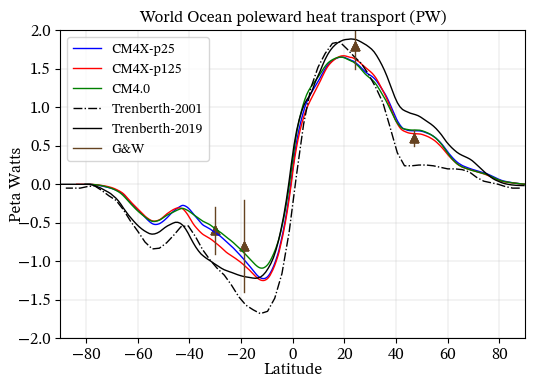

In [8]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.0,4.0))

htrans_global_p25.plot.line( ax=axis,label='CM4X-p25',linestyle='-', color='blue',linewidth=1) 
htrans_global_p125.plot.line(ax=axis,label='CM4X-p125',linestyle='-', color='red', linewidth=1) 
htrans_global_cm4p0.plot.line(ax=axis,label='CM4.0',linestyle='-',color='green', linewidth=1) 
#htrans_global_cm4p0.plot.line(ax=axis,label='CM4.0',linestyle=(0, (3, 1, 1, 1)),color='orange', linewidth=1) 
#OTe.plot(ax=axis,label='ECMWF', linestyle='None', marker='o', color='red', markersize=4) 
#OTe.plot(ax=axis,label='ECMWF', linestyle='-.', color='gray', linewidth=1) 
#OTe.plot.scatter(ax=axis,color='red', marker='o',s=100) 
OTn.plot(ax=axis,label='Trenberth-2001', linestyle='-.', color='black', linewidth=1) 
#OTn.plot.scatter(ax=axis, color='green', marker='.',s=100) 
OTt19.plot(ax=axis,label='Trenberth-2019', linestyle='-', color='black', linewidth=1) 


GW.gbl.annotate(ax=axis)

axis.legend(loc='upper left')
axis.set_ylim(-2,2.)
axis.set_xlim(-90,90)
axis.tick_params(axis='y', labelsize=12)
axis.tick_params(axis='x', labelsize=12)

axis.set_ylabel('Peta Watts',labelpad=-5, fontsize=12)
axis.set_xlabel('Latitude',labelpad=0, fontsize=12)
axis.grid(linewidth=.2)
axis.set_title('World Ocean poleward heat transport (PW)')
fig.savefig('Fig06_poleward_heat_transport_global.jpg', bbox_inches='tight', dpi=400, format='jpeg')


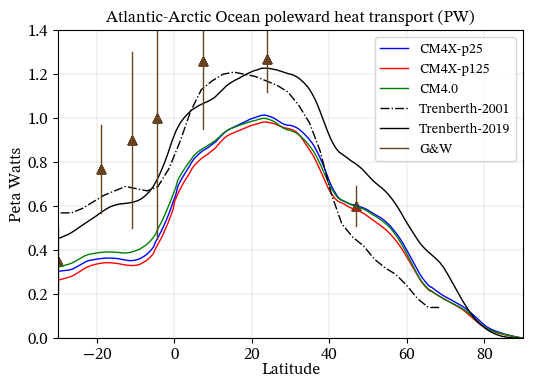

In [9]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.0,4.0))


htrans_atl_arc_p25.plot.line( ax=axis,label='CM4X-p25',linestyle='-', color='blue',linewidth=1) 
htrans_atl_arc_p125.plot.line(ax=axis,label='CM4X-p125',linestyle='-', color='red', linewidth=1) 
htrans_atl_arc_cm4p0.plot.line(ax=axis,label='CM4.0',linestyle='-',color='green', linewidth=1) 
#ATLe.plot(ax=axis,label='ECMWF', linestyle='-.', color='gray', linewidth=1) 
ATLn.plot(ax=axis,label='Trenberth-2001', linestyle='-.', color='black', linewidth=1) 
ATLt19.plot(ax=axis,label='Trenberth-2019', linestyle='-', color='black', linewidth=1) 

GW.atl.annotate(ax=axis)

axis.legend(loc='upper right')
axis.set_ylim(0,1.4)
axis.set_xlim(-30,90)
axis.tick_params(axis='y', labelsize=12)
axis.tick_params(axis='x', labelsize=12)

axis.set_ylabel('Peta Watts',labelpad=2, fontsize=12)
axis.set_xlabel('Latitude',labelpad=0, fontsize=12)
#axis.set_ylabel('')
#axis.set_xlabel('Latitude')
axis.grid(linewidth=.2)
axis.set_title('Atlantic-Arctic Ocean poleward heat transport (PW)')
fig.savefig('Fig06_poleward_heat_transport_atl_arc.jpg', bbox_inches='tight', dpi=400, format='jpeg')


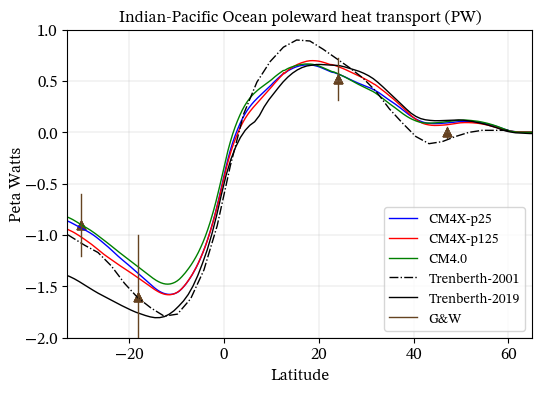

In [10]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.0,4.0))


htrans_ind_pac_p25.plot.line( ax=axis,label='CM4X-p25',linestyle='-', color='blue',linewidth=1) 
htrans_ind_pac_p125.plot.line(ax=axis,label='CM4X-p125',linestyle='-', color='red', linewidth=1) 
htrans_ind_pac_cm4p0.plot.line(ax=axis,label='CM4.0',linestyle='-',color='green', linewidth=1) 
#INDPACe.plot(ax=axis,label='ECMWF', linestyle='-.', color='gray', linewidth=1) 
INDPACn.plot(ax=axis,label='Trenberth-2001', linestyle='-.', color='black', linewidth=1) 
INDPACt19.plot(ax=axis,label='Trenberth-2019', linestyle='-', color='black', linewidth=1) 

GW.indpac.annotate(ax=axis)

axis.legend(loc='lower right')
axis.set_ylim(-2,1)
axis.set_xlim(-33,65)
axis.tick_params(axis='y', labelsize=12)
axis.tick_params(axis='x', labelsize=12)

axis.set_ylabel('Peta Watts',labelpad=0,fontsize=12)
#axis.set_xlabel('Latitude',labelpad=0)
#axis.set_ylabel('')
axis.set_xlabel('Latitude',fontsize=12)
axis.grid(linewidth=.2)
axis.set_title('Indian-Pacific Ocean poleward heat transport (PW)')
fig.savefig('Fig06_poleward_heat_transport_ind_pac.jpg', bbox_inches='tight', dpi=400, format='jpeg')
